In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [28]:
df=pd.read_csv("/Users/nipuntulsian/Desktop/Sem5/Data Analytics/Assignment5/Dataset/Dataset1/football_data.csv")
df

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 60
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,NaN
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,NaN
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,NaN
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,NaN
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,NaN
18203,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,NaN
18204,18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,NaN
18205,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  object 
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  object 
 13  Weak Foot                 18159 non-null  float64
 14  Skill 

In [30]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Unnamed: 60'],
      dtype='object')

In [31]:
col_shift=['Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Unnamed: 60']
rows_shift=df[df["Unnamed: 60"].notna()].index

rows_shift= np.append(rows_shift,15352)
for i in range(len(col_shift)-1):
    df.loc[rows_shift,col_shift[i]]= df.loc[rows_shift,col_shift[i+1]]

/var/folders/cs/hf2w52gd6h3dn28j5vx64ykc0000gn/T/ipykernel_26519/3336776683.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '3' '3' '2' '2' '2' '1' '2' '3' '2' '3' '2' '2' '2' '2' '1' '2' '2'
 '2' '1' '2' '2' '2' '2' '2' '2' '2' '2']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[rows_shift,col_shift[i]]= df.loc[rows_shift,col_shift[i+1]]
/var/folders/cs/hf2w52gd6h3dn28j5vx64ykc0000gn/T/ipykernel_26519/3336776683.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['16' '12' '8' '16' '6' '16' '64' '13' '15' '11' '16' '11' '10' '11' '13'
 '57' '7' '16' '11' '46' '14' '7' '14' '11' '9' '10' '12' '15']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[rows_shift,col_shift[i]]= df.loc[rows_shift,col_shift[i+1]]


In [32]:
df.drop(columns=['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight','Unnamed: 60','Release Clause'],inplace=True)

df=df.dropna()

In [33]:
X_train = MinMaxScaler().fit_transform(df)

In [34]:
centers=5

In [35]:
class KMeans():
    def __init__(self,n_clusters):
        self.n_clusters=n_clusters
    
    def euclidean(self,data,center):
        return np.sqrt(np.sum((data-center)**2,axis=1))
    
    def fit(self,X_train):
        new_centroid_idx, = np.random.choice(range(len(X_train)), size=1)
        self.centroids= [X_train[new_centroid_idx]]

        for _ in range(self.n_clusters-1):
            dists = np.min([self.euclidean(X_train,centroid) for centroid in self.centroids], axis=0)
            dists= dists**2
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        prev_centroids=None
        while np.not_equal(self.centroids, prev_centroids).any():
            cluster_points=[[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = self.euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                cluster_points[centroid_idx].append(x)
            prev_centroids=self.centroids
            self.centroids = [np.mean(cluster,axis=0) for cluster in cluster_points]

            for i,centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i]=prev_centroids[i]
    
    def predict(self,X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = self.euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

In [36]:
n_clusters=[3,5,7,10,15]
silhouette_scores=[]
distortion=[]

In [37]:
for k in n_clusters:
    kmeans=KMeans(k)
    kmeans.fit(X_train)
    class_centers, classification = kmeans.predict(X_train)
    silhouette_scores.append(silhouette_score(X_train,classification))

    dist=np.sum((X_train-class_centers)**2,axis=1)/len(X_train)
    distortion.append(np.sum(dist))

Text(0, 0.5, 'Silhouette Score')

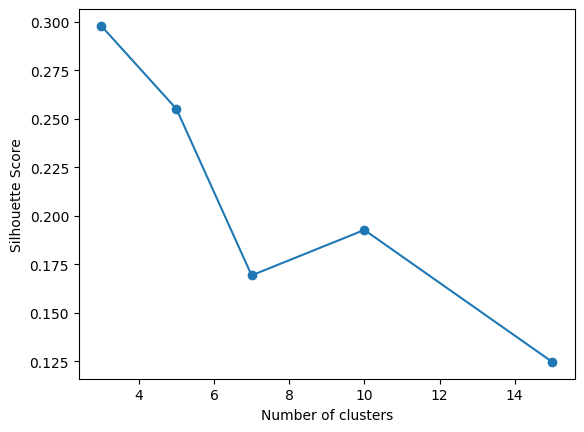

In [38]:
plt.plot(n_clusters,silhouette_scores)
plt.scatter(n_clusters,silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

Text(0, 0.5, 'Distortion')

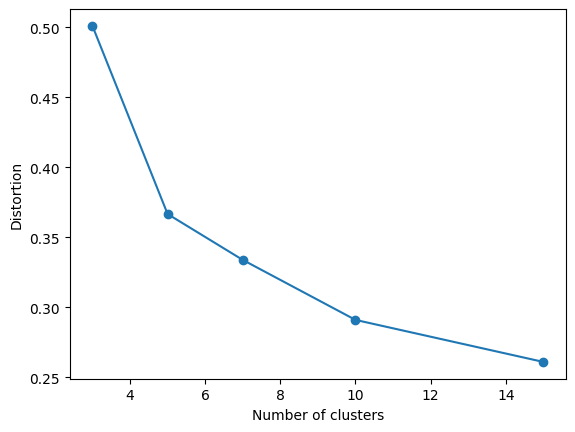

In [39]:
plt.plot(n_clusters,distortion)
plt.scatter(n_clusters,distortion)
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

### Optimal Number of Clusters
- Silhouette Score : 3
- Elbow Method : 7 because we have to select from 3,5,7 but at 7 still distortion has not become almost constant and is still decreasing steeply after that